# TRAFFIC ANALYSIS PROJECT
## BY: Group 5
1. Kevin Muchori
2. Benson Kamau
3. Sally Kinyanjui
4. Breden Mugambi
5. Nancy Chelangat

## Overview:  
The urban mobility and transportation sector are vital for the functioning of modern cities, enabling the movement of people and goods efficiently. Within this industry, traffic management and pedestrian safety are crucial components that directly impact the quality of life in urban areas. Effective traffic pattern analysis and prediction can help mitigate congestion, enhance safety, and improve overall urban mobility.
Well managed traffic leads to minimized economic losses, improved quality of life especially on the side of pedestrians.

## Challenges:
There are so many problems that are encountered especially in most urban towns whose vehicle and pedestrian population continues to grow every day. One of the problems is the traffic congestion which leads to higher traffic volumes which in turn brings about economic losses due to wasted time and fuel, increased pollution. Another key challenge is the pedestrian safety where High pedestrian traffic in urban areas increases the risk of accidents.  A challenge to also note is collecting accurate and real-time data from various sources is challenging which would make accurate traffic and pedestrian predictions challenging.

## Proposed solutions:
To solve some of these challenges would include measures such as advocating for sustainable urban mobility policies and invest in supportive infrastructure.  Use of Use machine learning models to analyze and predict traffic patterns and pedestrian crossings at different times of the day. In order to gather real-time data on traffic and pedestrian movement would require use of high technology like IoT devices.

## Conclusion:
The analysis and prediction of traffic congestion levels and pedestrian crossings are essential for enhancing urban mobility and safety. Successful implementation of these solutions can lead to reduced congestion, fewer accidents, and an overall improvement in the quality of urban life.


## Problem Statement:

Urban areas continue to face significant challenges in managing their traffic congestion and ensuring pedestrian safety. The changing nature of these areas together with the increasing volume of both vehicle and pedestrian traffic, makes it hard for one to predict traffic patterns affectively.

## Objective :
Our primary objective is to create an accurate time series model(s) that can model, analyze and predict traffic congestion levels and pedestrian crossings at different times of the day.

### Specific objectives:
1.  To identify key factors that influence traffic and pedestrian movement
2.  To develop predictive models for forecasting future traffic congestion and pedestrian crossing patterns.
3.  To provide recommendations for urban planners and traffic management authorities to improve traffic flow and pedestrian safety.


## Data Understanding
The data to use in this study is sourced from the UC Irvine Machine Learning Repository.  It has 4760 rows and 22 data features.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [29]:
#create a function that loads data and gets the info about the data.
def load_and_get_info(file_path, encoding='utf-8'):
    try :
        # Load data
        df = pd.read_csv(file_path, encoding=encoding)

        # Display the first few rows of the DataFrame
        df_head = df.head()

        # Get information about the DataFrame
        df_info = df.info()

        return df,df_info, df_head
    except UnicodeDecodeError:
        print(f"Failed to decode {file_path} with encoding {encoding}. Trying with 'latin1' encoding.")
        return load_and_get_info(file_path, encoding='latin1')

# A function that checks the data types of DataFrame columns and return the count of columns for each data type category.
def check_data_types(df):

    data_type_counts = df.dtypes.replace({'object': 'string'}).value_counts().to_dict()
    return data_type_counts

In [30]:
file_path = "/Users/jarma/Desktop/traffic_data.csv"
#file_path = '/Users/mac/Documents/GitHub/Traffic-analysis-project/traffic_data1 (1).csv'
df1,data_info, data_head = load_and_get_info(file_path)
print(data_info)
print("\nFirst few rows of the DataFrame:")
data_head #data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   oid                4759 non-null   object 
 1   timestamp          4759 non-null   object 
 2   date               4759 non-null   object 
 3   hour               4759 non-null   int64  
 4   x                  4759 non-null   float64
 5   y                  4759 non-null   float64
 6   vehicle_count      4759 non-null   int64  
 7   pedestrian_count   4759 non-null   int64  
 8   congestion_level   4759 non-null   object 
 9   weather_condition  4759 non-null   object 
 10  temperature        4759 non-null   float64
 11  location           4759 non-null   object 
 12  other_oid          4759 non-null   object 
 13  other_class        4759 non-null   object 
 14  other_x            4759 non-null   object 
 15  other_y            4759 non-null   object 
 16  body_roll          0 non

,oid,timestamp,date,hour,x,y,vehicle_count,pedestrian_count,congestion_level,weather_condition,...,other_oid,other_class,other_x,other_y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
0,oid_0,2023-01-01 00:00:00,2023-01-01,0,76.330009,37.469175,17,7,low,snowy,...,"['oid_284', 'oid_111', 'oid_354', 'oid_403', '...","['vehicle', 'pedestrian', 'cyclist', 'cyclist'...","[80.16643167796968, 23.193568120739716, 99.294...","[10.968289671858821, 54.31625209147144, 12.196...",NaN,NaN,NaN,NaN,NaN,NaN
1,oid_1,2023-01-01 01:00:00,2023-01-01,1,6.867522,42.072927,3,14,low,sunny,...,['oid_934'],['vehicle'],[18.255748305303598],[83.65003937685206],NaN,NaN,NaN,NaN,NaN,NaN
2,oid_2,2023-01-01 02:00:00,2023-01-01,2,3.076632,84.575050,12,49,high,cloudy,...,['oid_787'],['vehicle'],[77.73281545583741],[59.64309260346252],NaN,NaN,NaN,NaN,NaN,NaN
3,oid_3,2023-01-01 03:00:00,2023-01-01,3,35.477393,56.481094,4,23,medium,sunny,...,"['oid_3', 'oid_295', 'oid_293', 'oid_17']","['vehicle', 'vehicle', 'pedestrian', 'pedestri...","[42.84992200954636, 0.5787418544833112, 33.701...","[20.071410763398468, 78.18601194561984, 99.104...",NaN,NaN,NaN,NaN,NaN,NaN
4,oid_4,2023-01-01 04:00:00,2023-01-01,4,76.949776,94.133781,6,19,low,rainy,...,['oid_979'],['cyclist'],[58.92263259975318],[12.460936540645529],NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains the following columns:

oid: This column represents a unique identifier for each object record in the dataset.

timestamp: This column stores the exact time of each record

date: This column extracts the date portion from the timestamp column, providing the day without the time information.

hour: This column extracts the hour of the day (0-23) from the 'timestamp' column.

x: This column represents the X-coordinate of each object in our data.

y: This column represents the Y-coordinate of each object in our data.

vehicle_count: This column indicates the number of vehicles observed in the vicinity of each object record.

pedestrian_count: This column reflects the number of pedestrians observed in the vicinity of each object record.

congestion_level: This column categorizes the traffic congestion level at the time of each record.

weather_condition: This column represents the weather condition at the time of each record

temperature: This column holds the temperature recorded at the time of each data point.


## Data Cleaning

### Step 1: Dropping  the empty columns

The columns body_roll, body_pitch, body_yaw, head_roll, head_pitch, and head_yaw have no data therefore will not be useful for our project. We will therefore proceed to drop them.

In [31]:
columns_to_drop = ['body_roll', 'body_pitch', 'body_yaw', 'head_roll', 'head_pitch', 'head_yaw']
cleaned_df = df1.drop(columns=columns_to_drop)

Step 2: Convert the 'timestamp' column to datetime format

In [32]:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
cleaned_df['timestamp'] = pd.to_datetime(cleaned_df['timestamp'])

### Step 3: Check for and remove duplicate rows



In [33]:
cleaned_df = cleaned_df.drop_duplicates()
cleaned_df.head()

,oid,timestamp,date,hour,x,y,vehicle_count,pedestrian_count,congestion_level,weather_condition,temperature,location,other_oid,other_class,other_x,other_y
0,oid_0,2023-01-01 00:00:00,2023-01-01,0,76.330009,37.469175,17,7,low,snowy,-7.048842,Location_0,"['oid_284', 'oid_111', 'oid_354', 'oid_403', '...","['vehicle', 'pedestrian', 'cyclist', 'cyclist'...","[80.16643167796968, 23.193568120739716, 99.294...","[10.968289671858821, 54.31625209147144, 12.196..."
1,oid_1,2023-01-01 01:00:00,2023-01-01,1,6.867522,42.072927,3,14,low,sunny,25.756664,Location_1,['oid_934'],['vehicle'],[18.255748305303598],[83.65003937685206]
2,oid_2,2023-01-01 02:00:00,2023-01-01,2,3.076632,84.575050,12,49,high,cloudy,33.568159,Location_2,['oid_787'],['vehicle'],[77.73281545583741],[59.64309260346252]
3,oid_3,2023-01-01 03:00:00,2023-01-01,3,35.477393,56.481094,4,23,medium,sunny,34.154008,Location_3,"['oid_3', 'oid_295', 'oid_293', 'oid_17']","['vehicle', 'vehicle', 'pedestrian', 'pedestri...","[42.84992200954636, 0.5787418544833112, 33.701...","[20.071410763398468, 78.18601194561984, 99.104..."
4,oid_4,2023-01-01 04:00:00,2023-01-01,4,76.949776,94.133781,6,19,low,rainy,-1.296653,Location_4,['oid_979'],['cyclist'],[58.92263259975318],[12.460936540645529]


Below we will go ahead and breakdown timestamps:

In [34]:
import pandas as pd


# Extract date components
cleaned_df['year'] = cleaned_df['timestamp'].dt.year
cleaned_df['month'] = cleaned_df['timestamp'].dt.month

# Create time-based features
cleaned_df['day_of_week'] = cleaned_df['timestamp'].dt.dayofweek
cleaned_df['hour'] = cleaned_df['timestamp'].dt.hour



By breaking down our project into components, we can be able to use our data in more useful ways for example:
- Comapring traffic levels between weekdays and weekends
- Identifying patterns in traffic congestion at different times of the day.

In [35]:
cleaned_df.head(10)

,oid,timestamp,date,hour,x,y,vehicle_count,pedestrian_count,congestion_level,weather_condition,temperature,location,other_oid,other_class,other_x,other_y,year,month,day_of_week
0,oid_0,2023-01-01 00:00:00,2023-01-01,0,76.330009,37.469175,17,7,low,snowy,-7.048842,Location_0,"['oid_284', 'oid_111', 'oid_354', 'oid_403', '...","['vehicle', 'pedestrian', 'cyclist', 'cyclist'...","[80.16643167796968, 23.193568120739716, 99.294...","[10.968289671858821, 54.31625209147144, 12.196...",2023,1,6
1,oid_1,2023-01-01 01:00:00,2023-01-01,1,6.867522,42.072927,3,14,low,sunny,25.756664,Location_1,['oid_934'],['vehicle'],[18.255748305303598],[83.65003937685206],2023,1,6
2,oid_2,2023-01-01 02:00:00,2023-01-01,2,3.076632,84.575050,12,49,high,cloudy,33.568159,Location_2,['oid_787'],['vehicle'],[77.73281545583741],[59.64309260346252],2023,1,6
3,oid_3,2023-01-01 03:00:00,2023-01-01,3,35.477393,56.481094,4,23,medium,sunny,34.154008,Location_3,"['oid_3', 'oid_295', 'oid_293', 'oid_17']","['vehicle', 'vehicle', 'pedestrian', 'pedestri...","[42.84992200954636, 0.5787418544833112, 33.701...","[20.071410763398468, 78.18601194561984, 99.104...",2023,1,6
4,oid_4,2023-01-01 04:00:00,2023-01-01,4,76.949776,94.133781,6,19,low,rainy,-1.296653,Location_4,['oid_979'],['cyclist'],[58.92263259975318],[12.460936540645529],2023,1,6
5,oid_5,2023-01-01 05:00:00,2023-01-01,5,71.310578,89.333961,15,33,high,snowy,26.245580,Location_5,"['oid_541', 'oid_367', 'oid_912']","['cyclist', 'cyclist', 'pedestrian']","[26.80521388141838, 42.38347771179725, 72.8236...","[55.50172247282388, 73.11659830778898, 91.7515...",2023,1,6
6,oid_6,2023-01-01 06:00:00,2023-01-01,6,13.754011,48.245646,11,9,low,sunny,26.389156,Location_6,"['oid_592', 'oid_699', 'oid_783', 'oid_789', '...","['vehicle', 'vehicle', 'pedestrian', 'pedestri...","[22.5413353172063, 89.92316387700629, 87.03666...","[71.42968100176586, 9.94642134951219, 96.18504...",2023,1,6
7,oid_7,2023-01-01 07:00:00,2023-01-01,7,81.061662,28.188148,15,11,medium,snowy,-8.703227,Location_7,['oid_354'],['vehicle'],[81.59701492703762],[86.72715536650595],2023,1,6
8,oid_8,2023-01-01 08:00:00,2023-01-01,8,87.816034,39.362988,3,12,medium,sunny,23.729499,Location_8,"['oid_872', 'oid_362', 'oid_486']","['vehicle', 'cyclist', 'cyclist']","[24.195898102204104, 25.39676053509188, 28.502...","[47.21731412233026, 37.96164717219131, 16.6673...",2023,1,6
9,oid_9,2023-01-01 09:00:00,2023-01-01,9,68.806347,2.551334,2,9,high,rainy,29.737843,Location_9,"['oid_191', 'oid_241', 'oid_708', 'oid_272']","['cyclist', 'pedestrian', 'vehicle', 'cyclist']","[36.71817656917603, 73.06433889448265, 23.8781...","[4.668063990489724, 3.212343024031483, 24.1347...",2023,1,6


From the output,we see that we now have columns indicating the year, month and day of the week.

Let us see whether it works:

In [36]:
"""import pandas as pd

# Sample DataFrame
data = {'timestamp': ['2023-01-15', '2023-02-10', '2023-01-25', '2023-03-05'],
        'value': [10, 20, 15, 25]}
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month

# Filter for January data
january_data = df[df['month'] == 1]

print(january_data)
"""

"import pandas as pd\n\n# Sample DataFrame\ndata = {'timestamp': ['2023-01-15', '2023-02-10', '2023-01-25', '2023-03-05'],\n        'value': [10, 20, 15, 25]}\ndf = pd.DataFrame(data)\ndf['timestamp'] = pd.to_datetime(df['timestamp'])\ndf['month'] = df['timestamp'].dt.month\n\n# Filter for January data\njanuary_data = df[df['month'] == 1]\n\nprint(january_data)\n"

From the output we can see that the from the sample dataframe we had provided,the following timestamps are the ones that belong to the month of January.

In [37]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   oid                4759 non-null   object        
 1   timestamp          4759 non-null   datetime64[ns]
 2   date               4759 non-null   datetime64[ns]
 3   hour               4759 non-null   int32         
 4   x                  4759 non-null   float64       
 5   y                  4759 non-null   float64       
 6   vehicle_count      4759 non-null   int64         
 7   pedestrian_count   4759 non-null   int64         
 8   congestion_level   4759 non-null   object        
 9   weather_condition  4759 non-null   object        
 10  temperature        4759 non-null   float64       
 11  location           4759 non-null   object        
 12  other_oid          4759 non-null   object        
 13  other_class        4759 non-null   object        
 14  other_x 

# **EDA**

In [38]:
df = cleaned_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   oid                4759 non-null   object        
 1   timestamp          4759 non-null   datetime64[ns]
 2   date               4759 non-null   datetime64[ns]
 3   hour               4759 non-null   int32         
 4   x                  4759 non-null   float64       
 5   y                  4759 non-null   float64       
 6   vehicle_count      4759 non-null   int64         
 7   pedestrian_count   4759 non-null   int64         
 8   congestion_level   4759 non-null   object        
 9   weather_condition  4759 non-null   object        
 10  temperature        4759 non-null   float64       
 11  location           4759 non-null   object        
 12  other_oid          4759 non-null   object        
 13  other_class        4759 non-null   object        
 14  other_x 

Checking the values in the different columns

Plotting
create a function that will be used to plot histograms to show frequency in the different applicable columns

In [39]:
def frequency_plotting(df, column_name):
    """
    Plots a bar graph of the frequency distribution for a given column in a DataFrame,
    with values displayed on top of each bar.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot the frequency distribution for.
    """

    # Print value counts for reference
    print(df[column_name].value_counts())

    # Get values and counts
    x_values = df[column_name].value_counts().index
    y_values = df[column_name].value_counts().values

    # Create the bar graph
    plt.figure(figsize=(8, 6))  # Set a reasonable figure size
    bars = plt.bar(x_values, y_values, edgecolor='black')



    for bar, value in zip(bars, y_values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value,
                 ha='center', va='bottom')

    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()


weather_condition
snowy     1197
sunny     1194
rainy     1194
cloudy    1174
Name: count, dtype: int64


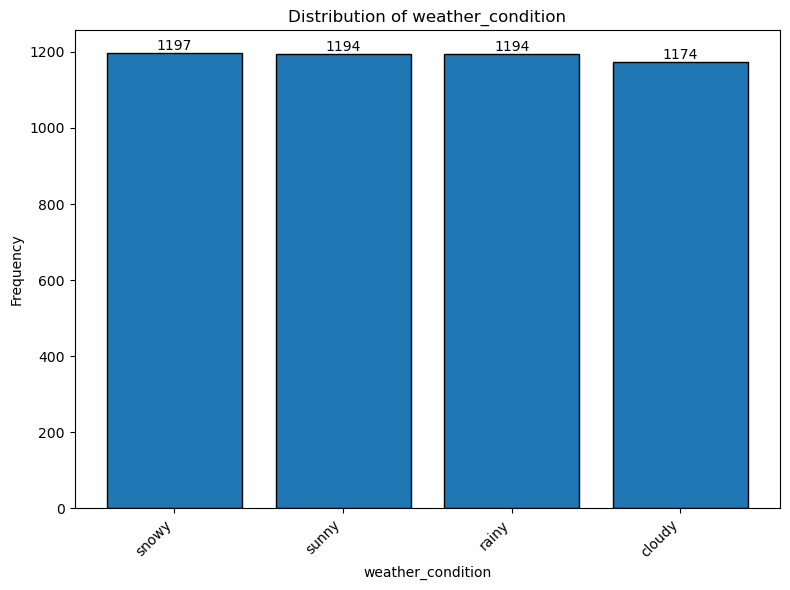

In [40]:
frequency_plotting(df, 'weather_condition')

congestion_level
low       1613
medium    1590
high      1556
Name: count, dtype: int64


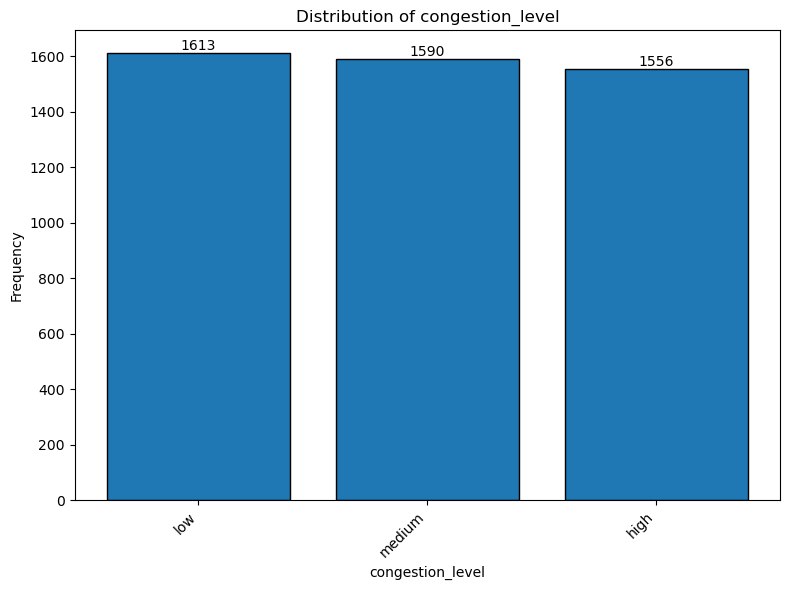

In [41]:
frequency_plotting(df, 'congestion_level')

temperature
-7.048842     1
 14.248410    1
 29.964628    1
 25.171177    1
 20.313640    1
             ..
 12.700280    1
 9.953869     1
 2.139950     1
-6.980358     1
 18.013396    1
Name: count, Length: 4759, dtype: int64


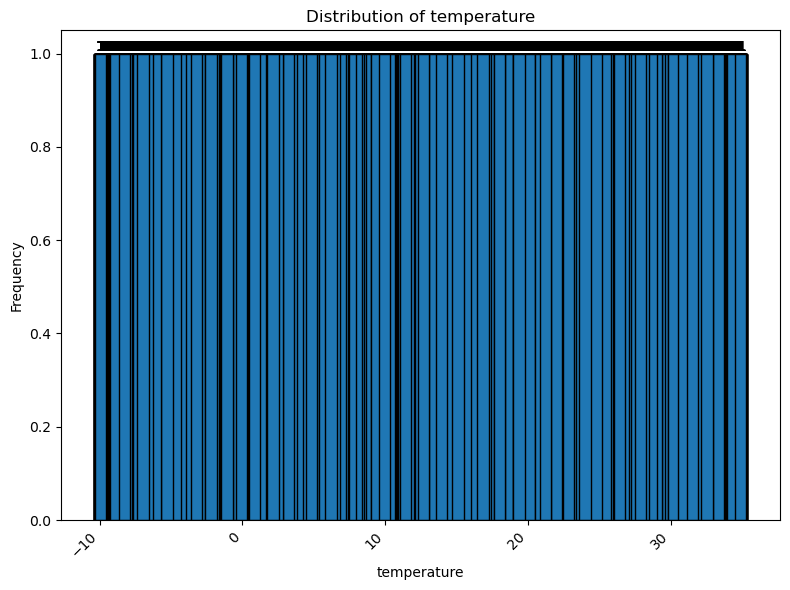

In [42]:
frequency_plotting(df, 'temperature')

temp and time?

vehicle_count
12    282
5     264
15    262
8     261
7     258
16    253
9     248
2     244
11    241
3     239
4     235
13    231
1     228
19    222
6     221
14    220
10    217
0     216
17    215
18    202
Name: count, dtype: int64


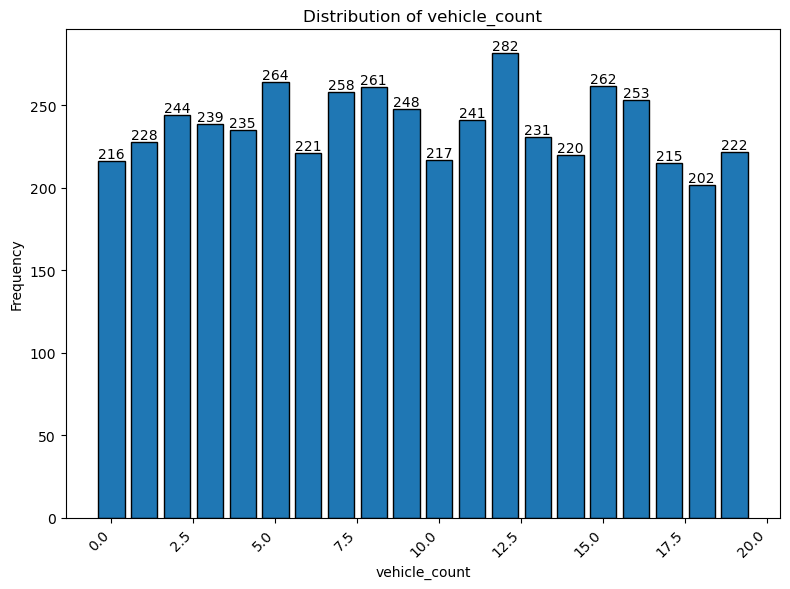

In [43]:
frequency_plotting(df, 'vehicle_count')

pedestrian_count
6     115
5     111
2     110
21    110
41    110
16    108
26    107
30    105
12    104
31    103
24    103
35    103
20    103
19    102
47    100
45    100
33    100
8     100
1      99
11     99
48     99
44     98
3      98
42     98
37     98
9      97
39     96
7      95
38     95
4      94
32     93
49     93
18     92
22     92
23     91
43     91
25     90
17     89
15     88
46     88
28     88
13     87
0      86
29     81
27     80
34     78
40     76
36     75
14     74
10     67
Name: count, dtype: int64


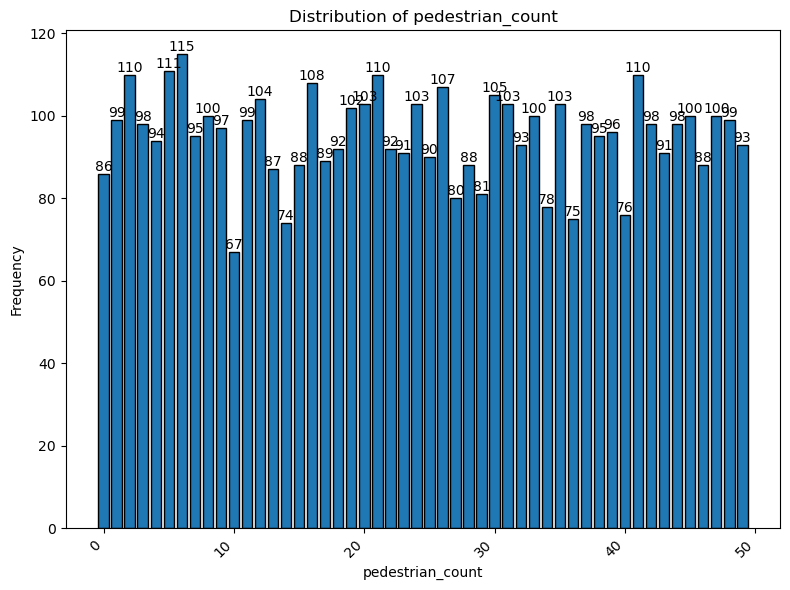

In [44]:
frequency_plotting(df, 'pedestrian_count')

### MODELING

In [45]:
#necessary libraries for modelimg
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as sm
import statsmodels.tsa.arima_model as ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from pandas import tseries
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX